In [1]:
import rdkit.Chem.AllChem as Chem
import json
import pandas as pd
import numpy as np
from mgktools.interpret.interpret import interpret_training_mols, interpret_atoms

In [2]:
from mgktools.hyperparameters import product_pnorm
df = pd.read_csv('../datasets/freesolv.csv')
smiles_to_be_interpret = 'c1ccccc1CCO'
smiles_train = df.smiles
targets_train = df['freesolv']
n_mol = 10
alpha = 0.01
mgk_hyperparameters_file = product_pnorm

# Interpretation as the sum of the contribution of the molecules in training set

In [3]:
y_pred, y_std, df_interpret= interpret_training_mols(
    [smiles_to_be_interpret], 
    smiles_train, 
    targets_train, 
    alpha=alpha, 
    n_mol=10, 
    output_order='sort_by_value', 
    mgk_hyperparameters_file=mgk_hyperparameters_file,
    n_jobs=1)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    4.0s


In [4]:
print('Prediction: %f +/- %f\n' % (y_pred, y_std * targets_train.std()))
print(df_interpret)

Prediction: -6.767196 +/- 0.531931

[                               smiles_train  contribution_percentage  \
0                             c1ccc(cc1)CCO                 0.911020   
1                            c1ccc(cc1)CCCO                 0.022730   
2        c1ccc2c(c1)C(=O)c3cccc(c3C2=O)NCCO                 0.005894   
3                              c1ccc(cc1)CO                 0.010676   
4  C([C@H]([C@H]([C@@H]([C@@H](CO)O)O)O)O)O                 0.001245   
5                        c1ccc(cc1)Cn2ccnc2                 0.003379   
6                            c1ccc(cc1)OC=O                 0.006666   
7             c1ccc(cc1)n2c(=O)c(c(cn2)N)Cl                 0.001498   
8                       CN(C)C(=O)Nc1ccccc1                 0.002259   
9                CC(=O)OCC(COC(=O)C)OC(=O)C                 0.002225   

   contribution_value  
0           -6.185827  
1           -0.157293  
2           -0.083748  
3           -0.070677  
4           -0.029408  
5           -0.025781  
6 

# Interpretation as the sum of the contribution of atoms

In [5]:
y_pred, y_std, mol = interpret_atoms(
    smiles_to_be_interpret, 
    smiles_train, 
    targets_train, 
    alpha=alpha, 
    mgk_hyperparameters_file=mgk_hyperparameters_file)

Prediction: -6.767331 +/- 0.531915



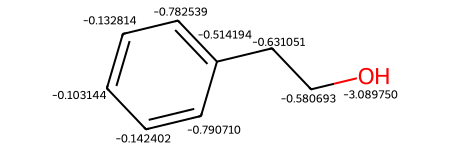

In [6]:
print('Prediction: %f +/- %f\n' % (y_pred, y_std * targets_train.std()))
mol

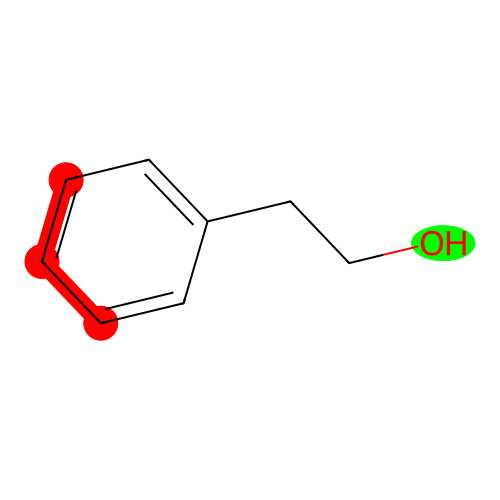

In [7]:
from mgktools.interpret.utils import display_mol
display_mol(mol, highlight_threshold_upper=-0.5, highlight_threshold_lower=-2.5, remove_number=True)